In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer


In [196]:
df=pd.read_csv("Employee Sample Data.csv")
df["Hire Date"]=pd.to_datetime(df["Hire Date"])
df["Hire Year"]=df["Hire Date"].dt.year
df["Hire Month"]=df["Hire Date"].dt.month
df["Hire Date"]=df["Hire Date"].dt.year
df['Bonus %']=df['Bonus %'].replace("[%]","",regex=True).astype(float)
df["Annual Salary"]=df["Annual Salary"].replace("[$,]","",regex=True).astype(float)
df=df.drop(["EEID","Full Name","Exit Date"], axis=1)

In [197]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Hire Year,Hire Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.382000,2011.786000,113217.365000,8.866000,2011.786000,6.259000
std,11.246981,7.560116,53545.985644,11.785625,7.560116,3.409332
min,25.000000,1992.000000,40063.000000,0.000000,1992.000000,1.000000
25%,35.000000,2007.000000,71430.250000,0.000000,2007.000000,3.000000
50%,45.000000,2014.000000,96557.000000,0.000000,2014.000000,6.000000
75%,54.000000,2018.000000,150782.250000,15.000000,2018.000000,9.000000
max,65.000000,2021.000000,258498.000000,40.000000,2021.000000,12.000000


In [198]:
df['Annual_Salary_Bonus']=df["Annual Salary"]*(df["Bonus %"]/100)
df["Annual_Salary_Added_Bonus"]=df["Annual Salary"]+df['Annual_Salary_Bonus']

Text(0.5, 1.0, 'Gender Salary Ratio')

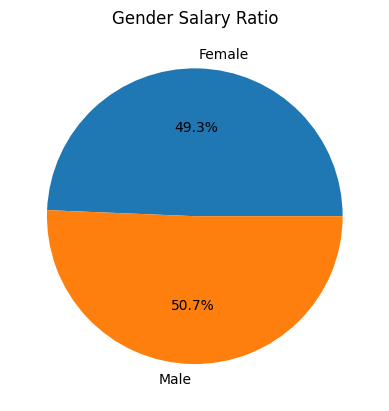

In [199]:
Gender_Salary_ratio=df.groupby(['Gender'])['Annual_Salary_Added_Bonus'].mean().reset_index()
plt.pie(Gender_Salary_ratio['Annual_Salary_Added_Bonus'],labels=Gender_Salary_ratio['Gender'], autopct='%1.1f%%')
plt.title('Gender Salary Ratio')

Text(0.5, 1.0, 'Department Salary Ratio')

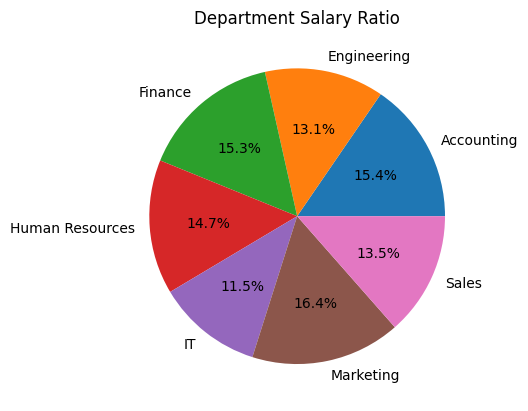

In [200]:
Department_Salary_ratio=df.groupby(["Department"])["Annual_Salary_Added_Bonus"].mean()
plt.pie(Department_Salary_ratio, labels=Department_Salary_ratio.index, autopct='%1.1f%%')
plt.title('Department Salary Ratio')

Text(0.5, 1.0, 'Department Salary Ratio')

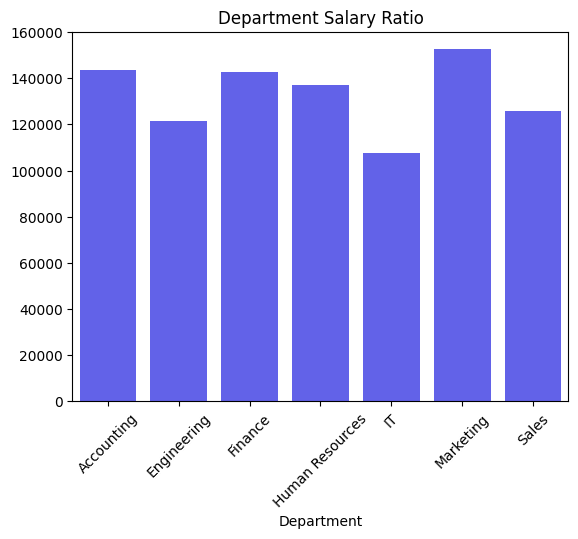

In [201]:
DepartmentSalaryRatio=df.groupby(["Department"])["Annual_Salary_Added_Bonus"].mean()
sns.barplot(x=DepartmentSalaryRatio.index, y=DepartmentSalaryRatio.values, color='blue', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Department Salary Ratio')

In [202]:

data=df.copy()

In [203]:
data.head(3)

,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Hire Year,Hire Month,Annual_Salary_Bonus,Annual_Salary_Added_Bonus
0,Sr. Manger,IT,Research & Development,Female,Black,55,2016,141604.0,15.0,United States,Seattle,2016,4,21240.6,162844.6
1,Technical Architect,IT,Manufacturing,Male,Asian,59,1997,99975.0,0.0,China,Chongqing,1997,11,0.0,99975.0
2,Director,Finance,Speciality Products,Female,Caucasian,50,2006,163099.0,20.0,United States,Chicago,2006,10,32619.8,195718.8


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Title                  1000 non-null   object 
 1   Department                 1000 non-null   object 
 2   Business Unit              1000 non-null   object 
 3   Gender                     1000 non-null   object 
 4   Ethnicity                  1000 non-null   object 
 5   Age                        1000 non-null   int64  
 6   Hire Date                  1000 non-null   int32  
 7   Annual Salary              1000 non-null   float64
 8   Bonus %                    1000 non-null   float64
 9   Country                    1000 non-null   object 
 10  City                       1000 non-null   object 
 11  Hire Year                  1000 non-null   int32  
 12  Hire Month                 1000 non-null   int32  
 13  Annual_Salary_Bonus        1000 non-null   float6

In [205]:

data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Title                  1000 non-null   object 
 1   Department                 1000 non-null   object 
 2   Business Unit              1000 non-null   object 
 3   Gender                     1000 non-null   object 
 4   Ethnicity                  1000 non-null   object 
 5   Age                        1000 non-null   int64  
 6   Hire Date                  1000 non-null   int32  
 7   Annual Salary              1000 non-null   float64
 8   Bonus %                    1000 non-null   float64
 9   Country                    1000 non-null   object 
 10  City                       1000 non-null   object 
 11  Hire Year                  1000 non-null   int32  
 12  Hire Month                 1000 non-null   int32  
 13  Annual_Salary_Bonus        1000 non-null   float6

0

In [206]:
unique_name=[]

for i in data.columns:
  unique=data[i].unique()
  unique_name.append(unique)
  
unique_name

[array(['Sr. Manger', 'Technical Architect', 'Director',
        'Computer Systems Manager', 'Sr. Analyst',
        'Account Representative', 'Manager', 'Analyst',
        'Controls Engineer', 'Vice President', 'Quality Engineer',
        'Engineering Manager', 'IT Coordinator', 'Analyst II',
        'Enterprise Architect', 'Sr. Business Partner', 'HRIS Analyst',
        'Field Engineer', 'Automation Engineer', 'Operations Engineer',
        'Business Partner', 'Cloud Infrastructure Architect',
        'Test Engineer', 'Network Architect', 'Network Engineer',
        'Development Engineer', 'Sr. Account Representative',
        'System Administrator\xa0', 'Systems Analyst',
        'Solutions Architect', 'IT Systems Architect',
        'Service Desk Analyst', 'Network Administrator'], dtype=object),
 array(['IT', 'Finance', 'Sales', 'Accounting', 'Human Resources',
        'Engineering', 'Marketing'], dtype=object),
 array(['Research & Development', 'Manufacturing', 'Speciality Product

In [207]:
data.nunique()

Job Title                      33
Department                      7
Business Unit                   4
Gender                          2
Ethnicity                       4
Age                            41
Hire Date                      30
Annual Salary                 996
Bonus %                        37
Country                         3
City                           13
Hire Year                      30
Hire Month                     12
Annual_Salary_Bonus           476
Annual_Salary_Added_Bonus    1000
dtype: int64

In [208]:
categorical_columns=["Job Title", "Department", "Business Unit", "Gender", "Ethnicity", "Country", "City"]

In [209]:

encoder=OneHotEncoder()
encoded=encoder.fit_transform(data[categorical_columns]).toarray()
pd.DataFrame(encoded)
data=pd.concat([data.drop(columns=categorical_columns), pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       1000 non-null   int64  
 1   Hire Date                                 1000 non-null   int32  
 2   Annual Salary                             1000 non-null   float64
 3   Bonus %                                   1000 non-null   float64
 4   Hire Year                                 1000 non-null   int32  
 5   Hire Month                                1000 non-null   int32  
 6   Annual_Salary_Bonus                       1000 non-null   float64
 7   Annual_Salary_Added_Bonus                 1000 non-null   float64
 8   Job Title_Account Representative          1000 non-null   float64
 9   Job Title_Analyst                         1000 non-null   float64
 10  Job Title_Analyst II                 

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       1000 non-null   int64  
 1   Hire Date                                 1000 non-null   int32  
 2   Annual Salary                             1000 non-null   float64
 3   Bonus %                                   1000 non-null   float64
 4   Hire Year                                 1000 non-null   int32  
 5   Hire Month                                1000 non-null   int32  
 6   Annual_Salary_Bonus                       1000 non-null   float64
 7   Annual_Salary_Added_Bonus                 1000 non-null   float64
 8   Job Title_Account Representative          1000 non-null   float64
 9   Job Title_Analyst                         1000 non-null   float64
 10  Job Title_Analyst II                 

EDA

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       1000 non-null   int64  
 1   Hire Date                                 1000 non-null   int32  
 2   Annual Salary                             1000 non-null   float64
 3   Bonus %                                   1000 non-null   float64
 4   Hire Year                                 1000 non-null   int32  
 5   Hire Month                                1000 non-null   int32  
 6   Annual_Salary_Bonus                       1000 non-null   float64
 7   Annual_Salary_Added_Bonus                 1000 non-null   float64
 8   Job Title_Account Representative          1000 non-null   float64
 9   Job Title_Analyst                         1000 non-null   float64
 10  Job Title_Analyst II                 

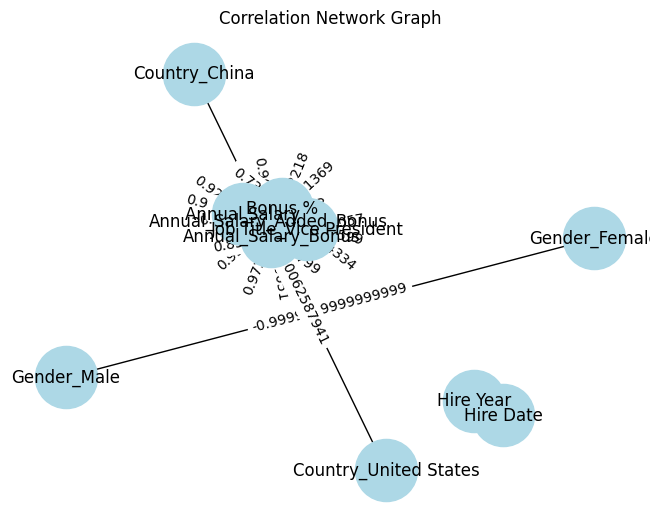

In [218]:
import networkx as nx

# Compute correlation matrix
corr_matrix = data.corr()

# Only keep correlations above a threshold
threshold = 0.7
edges = [(i, j, corr_matrix.loc[i, j]) 
         for i in corr_matrix.columns 
         for j in corr_matrix.columns 
         if i != j and abs(corr_matrix.loc[i, j]) > threshold]

# Build graph
G = nx.Graph()
for i, j, weight in edges:
    G.add_edge(i, j, weight=round(weight, 2))

# Draw
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): w for i, j, w in edges})
plt.title("Correlation Network Graph")
plt.show()


<AxesSubplot:xlabel='Annual Salary', ylabel='Annual_Salary_Added_Bonus'>

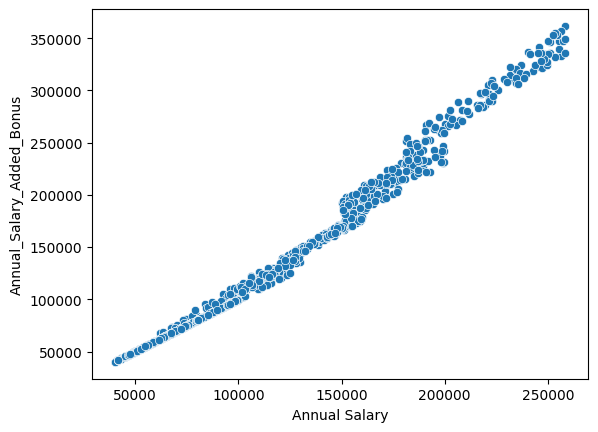

In [225]:
x_train, x_test, y_train, y_test = train_test_split(
	data.drop(columns=["Annual_Salary_Added_Bonus"]),
	data["Annual_Salary_Added_Bonus"],
	test_size=0.2,
	random_state=42
)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
sns.scatterplot(x=df["Annual Salary"], y=df["Annual_Salary_Added_Bonus"])

In [238]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)


0.996333164431994

In [241]:
from sklearn.linear_model import LinearRegression
model_2=LinearRegression()
model_2.fit(x_train_scaled, y_train)
model_2.score(x_test_scaled, y_test)

1.0